### Import Library

##### pandas = untuk manipulasi dan analisis data
##### numpy = memberikan dukungan untuk array dan matriks besar multidimensional
##### matplotlib = untuk visualisasi data di Python
##### sklearn-learn = menyediakan berbagai algoritma machine learning, termasuk regresi linier (LinearRegression yang diimpor dari sklearn.linear_model), untuk memprediksi hubungan antara variabel terikat dan variabel bebas dalam data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Memasukkan dataset
# Menampilkan 5 data pertama
dataset = pd.read_csv('R04_corruptions.csv')
dataset.head()

,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60


#### Kolom "Corruption Perception (X)" berisi nilai-nilai yang mewakili tingkat persepsi korupsi. Kolom "Government Transparency (Y)" berisi nilai-nilai yang mewakili tingkat transparansi pemerintahan yang menunjukkan seberapa transparan atau terbuka pemerintahan dalam praktiknya

In [3]:
# Menampilkan info dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Corruption Perception (X)    55 non-null     float64
 1   Government Transparency (Y)  55 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [4]:
# Mengecek korelasi pada daat X dan Y
dataset.corr()

,Corruption Perception (X),Government Transparency (Y)
Corruption Perception (X),1.000000,-0.920063
Government Transparency (Y),-0.920063,1.000000


#### Nilai -0.920063 menunjukkan bahwa variabel X dan Y tersebut berkorelasi negatif cukup kuat. 

In [5]:
# Split Kolom
x_train = dataset['Corruption Perception (X)'].values[:,np.newaxis]
y_train = dataset['Government Transparency (Y)'].values

#### x_train berisi data 'Corruption Perception (X)' sebagai variabel independen dan y_train akan berisi 'Government Transparency (Y)' sebagai variabel dependen

In [6]:
# Menampilkan data pada x_train
print (x_train)

[[3.2]
 [2.5]
 [4.1]
 [2.8]
 [3.5]
 [2.4]
 [3.9]
 [2.7]
 [3.8]
 [2.9]
 [4.2]
 [2.6]
 [3. ]
 [2.3]
 [4. ]
 [3.4]
 [2.2]
 [4.3]
 [3.3]
 [2.1]
 [4.4]
 [3.7]
 [2. ]
 [4.5]
 [3.6]
 [2.8]
 [4.2]
 [3.1]
 [2.7]
 [4.3]
 [3.9]
 [2.5]
 [4.4]
 [3. ]
 [2.6]
 [4.1]
 [3.2]
 [2.4]
 [4.5]
 [3.5]
 [2.9]
 [3.8]
 [2.3]
 [4. ]
 [3.4]
 [2.2]
 [4.4]
 [3.3]
 [2.1]
 [4.3]
 [3.7]
 [2. ]
 [4.5]
 [3.6]
 [2.8]]


In [7]:
# Menampilkan data pada y_train
print (y_train)

[65 72 58 68 60 75 55 70 57 71 54 73 65 76 56 62 78 53 63 80 52 59 82 51
 61 69 55 66 72 54 57 70 53 65 73 58 68 75 51 60 71 56 76 52 62 78 53 63
 80 54 59 82 61 69 50]


In [8]:
# Modelling
lm = LinearRegression()
lm.fit(x_train,y_train) 

LinearRegression()

In [9]:
# Testing
# Kode ini merupakan proses prediksi menggunakan model regresi linier (lm) yang telah dilatih sebelumnya.
x_test = [[2.1],[3.9],[4.5],[2.5],[3.8]]
predict = lm.predict(x_test)
print(predict)

[77.33283736 57.67092624 51.11695587 72.96352377 58.76325463]


In [12]:
#Rumua regresi -> y = ax + b (a = koefisien, b = intercept)
print('Koefisien :' + str(lm.coef_))
print('Intercept :' +str(lm.intercept_))

Koefisien :[-10.92328395]
Intercept :100.27173366009497


In [17]:
# Testing Manual
y = lm.coef_ * 3.5 + lm.intercept_
print(y)

[62.04023982]


#### prediksi untuk nilai 'Government Transparency' saat 'Corruption Perception' adalah 3.5 adalah 62.04023982

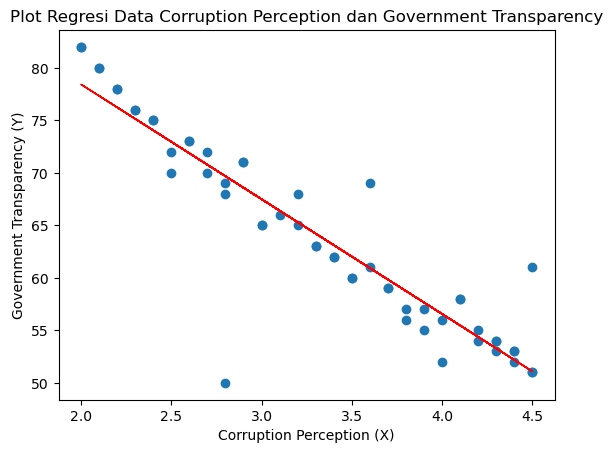

In [23]:
# Proses Pembuatan Visualisai Data

prediksibaru = lm.predict(x_train)
dfBaru = pd.DataFrame({'Corruption Perception (X)' : dataset['Corruption Perception (X)'], 'Government Transparency (Y)':prediksibaru})
plt.scatter(dataset['Corruption Perception (X)'], dataset['Government Transparency (Y)'])
plt.plot(dfBaru['Corruption Perception (X)'], dfBaru['Government Transparency (Y)'], color = 'red', linewidth=1)
plt.xlabel("Corruption Perception (X)")
plt.ylabel('Government Transparency (Y)')
plt.title('Plot Regresi Data Corruption Perception dan Government Transparency')
plt.show()

### Cek Akurasi

In [21]:
from sklearn.metrics import r2_score
akurasi = r2_score(dataset,dfBaru)
print(akurasi*100)

92.32578583480844
